In [21]:
import pandas as pd
import sqlite3
import gzip
import shutil
import seaborn as sns
import numpy as np

with gzip.open('zippedData/tn.movie_budgets.csv.gz', 'rb') as f_in:
    with open('tn.movie_budgets.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData/')

In [83]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
movie_gross = pd.read_csv('unzippedData/bom.movie_gross.csv')

In [3]:
movie_info = pd.read_csv('unzippedData/rt.movie_info.tsv',sep = '\t')

In [4]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')

In [5]:
rt_score = pd.read_csv('unzippedData/rt.reviews.tsv', sep = '\t', encoding = 'latin-1')

In [6]:
rt_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [7]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [9]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.strip('$').str.replace(",","").astype(float)

In [28]:
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [20]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [11]:
conn = sqlite3.connect('unzippedData/im.db')

In [12]:
movie_basics = pd.read_sql("""
SELECT *

FROM movie_basics

""",conn)

In [32]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
movie_basics.groupby('genres').size()

genres
Action                        2219
Action,Adult,Comedy              2
Action,Adventure               114
Action,Adventure,Animation     197
Action,Adventure,Biography      34
                              ... 
Thriller,War,Western             1
Thriller,Western                 4
War                            131
War,Western                      1
Western                        142
Length: 1085, dtype: int64

In [15]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
movie_akas = pd.read_sql("""
SELECT *

FROM movie_akas

""",conn)

In [17]:
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [31]:
movie_budgets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   profit             5782 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 316.3+ KB


In [56]:
badf = pd.read_sql("""
SELECT *

FROM 
    movie_ratings AS mr
    INNER JOIN movie_basics AS mb
    USING (movie_id)
WHERE
    numvotes > 500

""",conn)

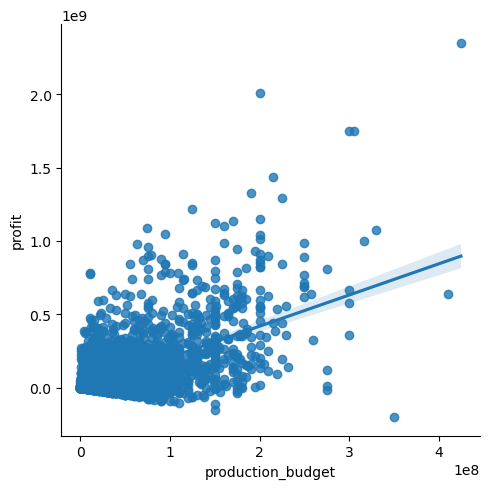

In [29]:
ax = sns.lmplot(data = movie_budgets, x = 'production_budget', y  = 'profit')

In [58]:
badf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880 entries, 0 to 13879
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         13880 non-null  object 
 1   averagerating    13880 non-null  float64
 2   numvotes         13880 non-null  int64  
 3   primary_title    13880 non-null  object 
 4   original_title   13880 non-null  object 
 5   start_year       13880 non-null  int64  
 6   runtime_minutes  13827 non-null  float64
 7   genres           13877 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 867.6+ KB


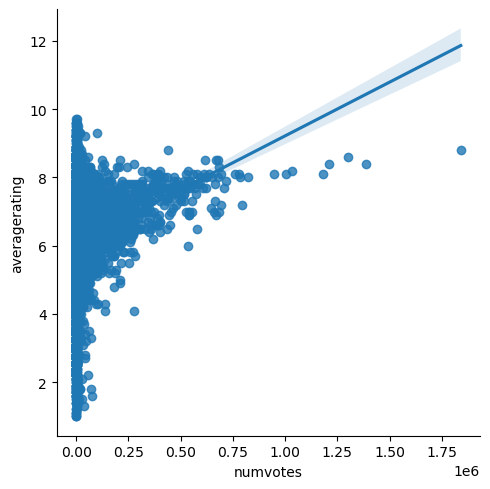

In [61]:
ax = sns.lmplot(data = badf, x = 'numvotes', y  = 'averagerating')

In [69]:
badf_bud = badf.merge(movie_budgets,
          left_on = 'primary_title'
          ,right_on = 'movie'
          ,how = 'inner').sort_values(by = 'profit', ascending = False)

In [98]:
badf.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Adventure,Comedy,Family,Crime,Thriller,Sport,Animation,Horror,Fantasy,Romance,Sci-Fi,Documentary,History,Music,Mystery,Drama,War,Biography,Musical,Action
0,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False
3,tt1130982,6.4,571,The Night Clerk,Avant l'aube,2011,104.0,"Drama,Thriller",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


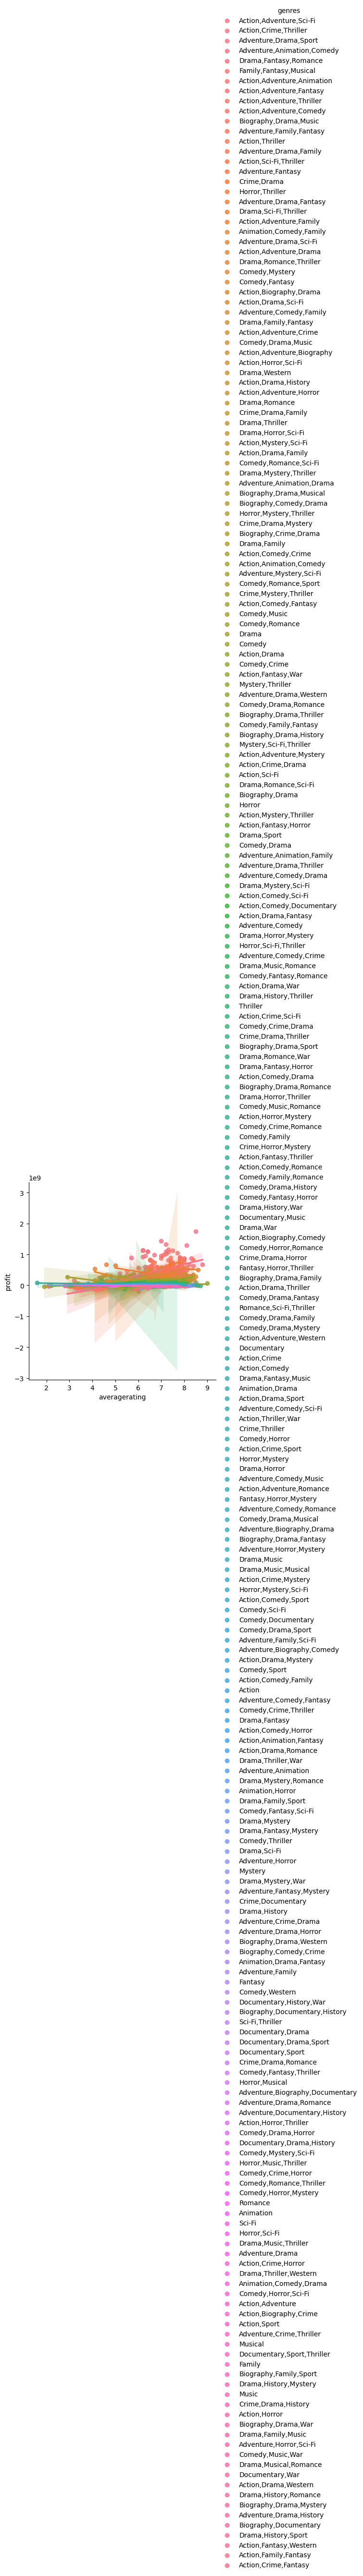

In [70]:
sns.lmplot(data = badf_bud, x = 'averagerating', y = 'profit', hue = 'genres')

In [81]:
genre_list = ['Action','Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Sport', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Sci-Fi', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War', 'Biography', 'Musical']
for genre in genre_list:
    badf[genre] = badf['genres'].str.contains(genre)

In [101]:
badf_bud.loc[badf_bud['production_budget'] > 100000]


,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
1895,tt4154756,8.5,670926,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
261,tt0369610,7.0,539338,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
451,tt2820852,7.2,335074,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09
1301,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09
329,tt1825683,7.3,516148,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09
299,tt4881806,6.2,219125,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09
548,tt1323045,6.2,62311,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport",56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,1.122470e+09
549,tt2294629,7.5,516998,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy",56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,1.122470e+09
1051,tt2316801,6.4,18100,Beauty and the Beast,La belle et la bête,2014,112.0,"Drama,Fantasy,Romance",35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,1.099200e+09
1049,tt2771200,7.2,238325,Beauty and the Beast,Beauty and the Beast,2017,129.0,"Family,Fantasy,Musical",35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,1.099200e+09


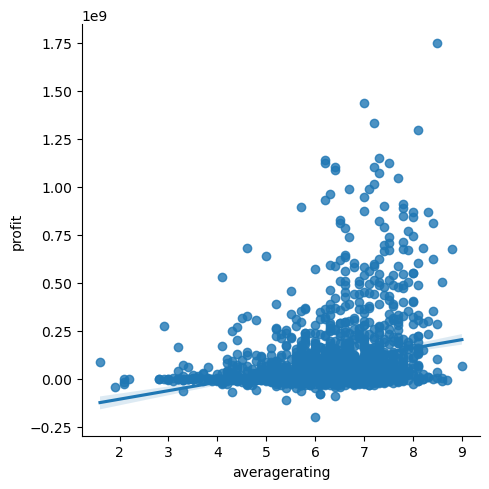

In [80]:
sns.lmplot(data = badf_bud, x = 'averagerating', y = 'profit')